# Introduction

*✏️ Write 2-3 sentences describing your research.*

## Overarching Question: What effect does technology usage have on teens?

I am interested in this topic after recently reading “The Anxious Generation.” by Johnathan Haidt In this book, Haidt, explores how the wide prevalence of the smartphone and social media has rewired childhood for kids during middle school and early high school. His main premise is that increased social media and smartphone usage has led to the massive increases in depression and anxiety we have seen since 2012, which is about the same time the smartphone became readily available. While I think this project will be similar to his work, I will not set out to look at his main premise, but rather explore some other ideas related to teen tech habits. This question also has relevance to my work as a teacher where social media is a daily part of my students’ lives. 

# Data

In [1]:
#Include any import statements you will need
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
### 💻 FILL IN YOUR DATASET FILE NAME BELOW 💻 ###

file_name = "March 7-April 10, 2018 - Teens and Tech Survey - CSV.csv"
dataset_path = "data/" + file_name

df = pd.read_csv(dataset_path)

In [3]:
df.head()

CASEID SURV_LANG  FITIN  FRIEND1  FRIEND2  FRIEND3  FRIEND4_1  FRIEND4_2  \
0       2        EN    NaN        3        1        2          0          1   
1       7        EN    2.0        2        1        3          1          1   
2       9        EN    2.0        2        1        3          0          0   
3      10        EN    1.0        4        3        2          0          1   
4      13        EN    2.0        4        4        2          0          1   

   FRIEND4_3  FRIEND4_4  ...  HH25  HH612  HH1317 HH18OV   CO_DATE   DURATION  \
0          0          1  ...     1      3       2      4  20180322  22.866667   
1          1          0  ...     0      2       2      4  20180324  17.850000   
2          0          1  ...     1      2       1      2  20180323  12.316667   
3          1          0  ...     0      0       1      2  20180402   9.733333   
4          0          0  ...     0      1       2      3  20180308  14.633333   

  SURV_MODE MODE_END      DEVICE    WEIGHT  
0         1        1     Desktop  0.794092  
1         2        2  Smartphone  0.313173  
2         2        2  Smartphone  0.357175  
3         2        2  Smartphone  0.762108  
4         2        2  Smartphone  0.842675  

[5 rows x 176 columns]

**Data Overview**

This data set shows the results of a survey by the Pew Research Center given to teens in 2018. Teens were asked various questions about technology and most were answered on a scale of 0-4. The dataset also includes some general demographic information. A key supplements the data which includes the full question and responses for each question. I will refer to those questions and responses in the methods and results below.

# Methods and Results

First, the data relavant to this study will be extracted into a new data set.



In [4]:
new_df=df[['AGE','INTREQ','FITIN','SOC1']]
new_df.head()

AGE  INTREQ  FITIN  SOC1
0   14       5    NaN   3.0
1   15       1    2.0   2.0
2   13       2    2.0   3.0
3   17       1    1.0   2.0
4   15       2    2.0   2.0

## First Research Question: How does the amount of time teens spend on technology vary by age?


### Methods

*Explain how you will approach this research question below. Consider the following:* 
  - *Which aspects of the dataset will you use?* 
  - *How will you reorganize/store the data?* 
  - *What data science tools/functions will you use and why?* 
  
✏️ *Write your answer below:*

Teens in this survery were grouped into 5 age categories ranging incluisviely from age 13 to age 17. The number of participants in each category was roughly equal as indicated in the table below.

Figure 1 shows a countplot of number of teens vs. age, and broken down based on their answer to the question "How frequently do you use technology?" A countplot was selected here in order to indicate how many participants fit in a certain category.

The numeric scores on the legend correspond as follows:
1- Almost constantly
2- Several Times a Day
3- About Once a Day
4- Several times a week
5- Less often

Figure 2 focuses on the most frequent response (almost constantly and several times a day) and then sorts those responses by age to provide another way to look at the most frequent responses in the data.

### Results 

Table 1: Percent of Respondents in Each Age Category

In [5]:
new_df.AGE.value_counts(normalize=True)

13    0.220727
15    0.211306
16    0.192463
17    0.191117
14    0.184388
Name: AGE, dtype: float64

Figure 1: Number of Respondents in Each Age Category Bassed on How Frequently They Utilize Technology

In [6]:
import seaborn as sns
sns.set_theme()


<Axes: xlabel='AGE', ylabel='count'>

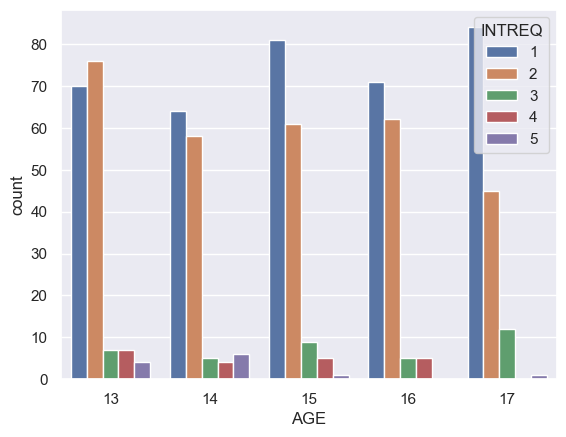

In [7]:
sns.countplot(data=new_df, x="AGE", hue="INTREQ")


# Is there a way to put these labels on the key/legend?
#new_labels = ["Almost Constantly", "Several Times a Day", "About Once a Day", "Several times a week", "Less often"]
#handles, labels = get_legend_handles_labels()
#legend(handles, new_labels)

Figure 2: Number of Teens That Use Technology Almost Constantly or Several Times Per Day Sorted by Age

In [8]:
bins = [0, 1, 2]
labels = ["Almost Constantly", "Several Times Per Day"]
new_df["Tech Frequency"] = pd.cut(new_df.INTREQ, bins=bins, labels=labels)

/var/folders/c3/lngy07lx6hx3_kdztwrlr7j80000gn/T/ipykernel_12977/2489872726.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Tech Frequency"] = pd.cut(new_df.INTREQ, bins=bins, labels=labels)


<Axes: xlabel='Tech Frequency', ylabel='count'>

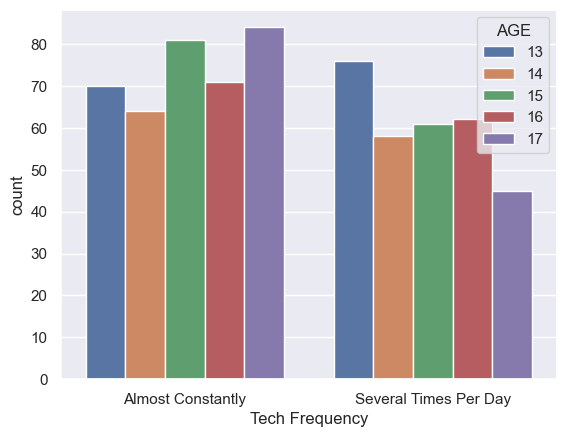

In [9]:
sns.countplot(data=new_df, x="Tech Frequency", hue="AGE")

## Second Research Question: How does frequency of using technology correspond with how well a teen perceives he or she fits in? and How does frequency of using social media correspond with how much a teen thinks social media has an effect on people their age?


### Methods

*Explain how you will approach this research question below. Consider the following:* 
  - *Which aspects of the dataset will you use?* 
  - *How will you reorganize/store the data?* 
  - *What data science tools/functions will you use and why?* 

✏️ *Write your answer below:*
This question will continue to look at the responses sorted by age, but this time will focus on the responses to 2 questions.

The first, "In general, which of the following statements comes closest to describing how you see yourself compared with other people your age where you live?" where the choices were 1-I tend to fit in pretty easily or 2-I tend to stand out.

And the second, "Overall, what effect would you say social media has had on people your age?", where the choices were 1-mostly positive, 2- mostly negative, or 3- neither positive or negative.



### Results 

<Axes: xlabel='INTREQ', ylabel='count'>

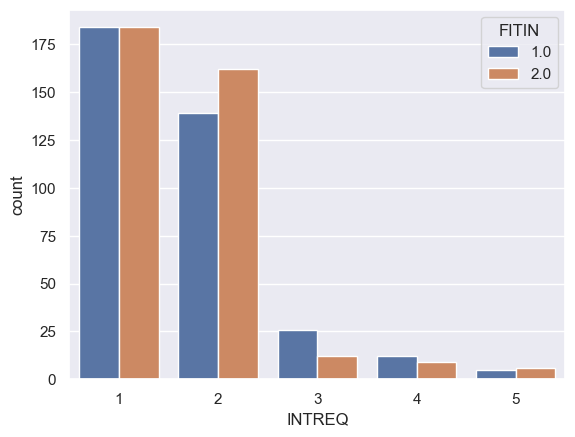

In [10]:
sns.countplot(data=new_df, x="INTREQ", hue="FITIN")

<Axes: xlabel='INTREQ', ylabel='count'>

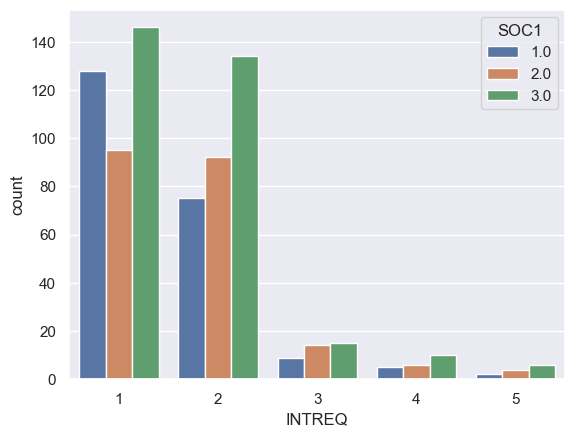

In [11]:
sns.countplot(data=new_df, x="INTREQ", hue="SOC1")


# Discussion

## Considerations

*It's important to recognize the limitations of our research.
Consider the following:*

- *Do the results give an accurate depiction of your research question? Why or why not?*
- *What were limitations of your datset?*
- *Are there any known biases in the data?*

✏️ *Write your answer below:*

## Summary

*Summarize what you discovered through the research. Consider the following:*

- *What did you learn about your media consumption/digital habits?*
- *Did the results make sense?*
- *What was most surprising?*
- *How will this project impact you going forward?*

✏️ *Write your answer below:*